## 单层感知机单输出梯度

误差函数为 Softmax+MSE 损失函数的神经网络,该表示图如下：  
![](imgs1/01.png)




In [5]:
import tensorflow as tf

print(tf.__version__)

x = tf.random.normal([2,3])
w = tf.ones([3,1])
b = tf.ones([1])

y = tf.constant([1])

# 里所有GradientTape来计算其梯度值
with tf.GradientTape() as tape:
    # 对于 constant 的类型需要使用tap.watch来实现
    # 对于varible类型会自动加载进来
    tape.watch([w,b])
    logits = tf.sigmoid(x@w+b)
    loss = tf.reduce_mean(tf.losses.MSE(y,logits))

grads = tape.gradient(loss,[w,b])

print("w grad:",grads[0])
print("b grad:",grads[1])


2.3.0
w grad: tf.Tensor(
[[-0.15914625]
 [ 0.1357163 ]
 [ 0.1689265 ]], shape=(3, 1), dtype=float32)
b grad: tf.Tensor([-0.13925377], shape=(1,), dtype=float32)


### 多输出的感知机

In [58]:
import tensorflow as tf

x = tf.random.normal([2,3])
w = tf.Variable(tf.random.normal([3,3],seed=1024))
print(w)
b = tf.Variable(tf.zeros([3]))

# 输出为3个类别
y = tf.constant([2,1])
y = tf.one_hot(y,depth=3)
print(y)

with tf.GradientTape() as tape:
    z = x@w+b
    # o = tf.sigmoid(z)
    # 多分类模型使用的输出函数
    pred = tf.nn.softmax(z,axis=1)
    # pred = 
    print(pred)
    loss = tf.reduce_mean(tf.losses.MSE(y,pred))
    print(loss)




<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[ 0.22887202, -0.46644917,  2.1721296 ],
       [ 0.94422203,  0.16057329, -0.84955543],
       [-0.3629656 ,  0.02989185,  0.8988999 ]], dtype=float32)>
tf.Tensor(
[[0. 0. 1.]
 [0. 1. 0.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[0.06995065 0.03293569 0.8971136 ]
 [0.21901554 0.7146287  0.0663558 ]], shape=(2, 3), dtype=float32)
tf.Tensor(0.025061857, shape=(), dtype=float32)


### 两层网络的情况



In [7]:
import tensorflow as tf

x =tf.constant(1.)
w1 = tf.constant(2.)
b1 = tf.constant(1.)
w2 = tf.constant(2.)
b2 = tf.constant(1.)

# persistent = True 可以使用多次 gradient来求解
with tf.GradientTape(persistent=True) as tape:
    # 非 tf.Variable 类型的张量需要人为设置记录梯度信息 
    tape.watch([w1,b1,w2,b2])
    y1 = w1*x+b1
    y2 = w2*y1+b2

dy2_dy1 = tape.gradient(y2,[y1])[0]
dy1_dw1 = tape.gradient(y1,[w1])[0]
dy2_dw1 = tape.gradient(y2,[w1])[0]

# 链式法则求解
print(dy2_dy1*dy1_dw1)
# 
print(dy2_dw1)

tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)


###  Himmelblau 函数优化实战
(𝑥2 + 𝑦 − 11)2 + (𝑥 + 𝑦2 − 7)2

x,y,range: (120,) (120,)
X,Y,range: (120, 120) (120, 120)
(120, 120)


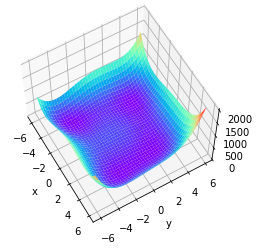

In [2]:
import  numpy as np
from    matplotlib import pyplot as plt
import  tensorflow as tf

def himmelblau(x):
    return (x[0]**2+x[1]-11)**2 + (x[0]+x[1]**2-7)**2

x = np.arange(-6,6,0.1)
y = np.arange(-6,6,0.1)

print('x,y,range:',x.shape,y.shape)

X,Y = np.meshgrid(x,y)
print('X,Y,range:',X.shape,Y.shape)

Z= himmelblau([X,Y])
print(Z.shape)

fig = plt.figure('himmelblau')
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y,Z,cmap=plt.cm.rainbow)
ax.view_init(60, -30)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()


In [78]:
# x = tf.constant([-2.0,2.])
# x = tf.constant([-4., 0.])
x = tf.constant([1., 0.])

for step in range(200):
    with tf.GradientTape() as tape:

        tape.watch([x])
        y = himmelblau(x)

    grads = tape.gradient(y,[x])[0]
    x -= 0.01*grads

    if step % 20 == 0:
        print ('step {}: x = {}, f(x) = {}'.format(step, x.numpy(), y.numpy()))

step 0: x = [1.52       0.19999999], f(x) = 136.0
step 20: x = [3.0181046 1.9543334], f(x) = 0.053223542869091034
step 40: x = [3.0000513 1.9998763], f(x) = 4.185585567029193e-07
step 60: x = [3.0000002 1.9999996], f(x) = 3.637978807091713e-12
step 80: x = [3.0000002 1.9999996], f(x) = 1.8189894035458565e-12
step 100: x = [3.0000002 1.9999996], f(x) = 1.8189894035458565e-12
step 120: x = [3.0000002 1.9999996], f(x) = 1.8189894035458565e-12
step 140: x = [3.0000002 1.9999996], f(x) = 1.8189894035458565e-12
step 160: x = [3.0000002 1.9999996], f(x) = 1.8189894035458565e-12
step 180: x = [3.0000002 1.9999996], f(x) = 1.8189894035458565e-12


### fashionNMIST

- 构建一个5层的网络
- 利用keras的API来创建网络，以及创建反向传播


In [15]:
import tensorflow as tf
from tensorflow.keras import datasets,losses,optimizers,models,layers,Sequential
import matplotlib.pyplot as plt
print(tf.__version__)


# 准备数据
(x,y),(x_test,y_test) = datasets.fashion_mnist.load_data()
print(x.shape)
print(y.shape)
print(y[0])

def data_preprocess(x,y):
    # 归一化
    x = tf.cast(x,dtype=tf.float32)/255.
    y = tf.cast(y,dtype=tf.float32)
    return x,y
    
batch_size = 128    
db = tf.data.Dataset.from_tensor_slices((x,y))
db = db.map(data_preprocess).shuffle(10000).batch(batch_size)

db_test = tf.data.Dataset.from_tensor_slices((x_test,y_test))
db_test = db_test.map(data_preprocess).batch(batch_size)

next_db = iter(db)
print(next(next_db)[0].shape)


# 构建网络
model = Sequential([
    layers.Dense(256,activation=tf.nn.relu),
    layers.Dense(128,activation=tf.nn.relu),
    layers.Dense(64,activation=tf.nn.relu),
    layers.Dense(32,activation=tf.nn.relu),
    layers.Dense(10)])

model.build(input_shape=[None,28*28])
model.summary()


2.3.0
(60000, 28, 28)
(60000,)
9
(128, 28, 28)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                330       
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_________________________________________________________________
